# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [3]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

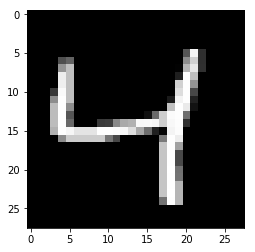

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [6]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [7]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [8]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6937
Epoch: 1/20... Training loss: 0.6907
Epoch: 1/20... Training loss: 0.6876
Epoch: 1/20... Training loss: 0.6841
Epoch: 1/20... Training loss: 0.6795
Epoch: 1/20... Training loss: 0.6742
Epoch: 1/20... Training loss: 0.6677
Epoch: 1/20... Training loss: 0.6598
Epoch: 1/20... Training loss: 0.6510
Epoch: 1/20... Training loss: 0.6404
Epoch: 1/20... Training loss: 0.6283
Epoch: 1/20... Training loss: 0.6150
Epoch: 1/20... Training loss: 0.6016
Epoch: 1/20... Training loss: 0.5857
Epoch: 1/20... Training loss: 0.5683
Epoch: 1/20... Training loss: 0.5541
Epoch: 1/20... Training loss: 0.5363
Epoch: 1/20... Training loss: 0.5169
Epoch: 1/20... Training loss: 0.5022
Epoch: 1/20... Training loss: 0.4793
Epoch: 1/20... Training loss: 0.4607
Epoch: 1/20... Training loss: 0.4479
Epoch: 1/20... Training loss: 0.4289
Epoch: 1/20... Training loss: 0.4170
Epoch: 1/20... Training loss: 0.3978
Epoch: 1/20... Training loss: 0.3907
Epoch: 1/20... Training loss: 0.3776
E

Epoch: 1/20... Training loss: 0.1762
Epoch: 1/20... Training loss: 0.1754
Epoch: 1/20... Training loss: 0.1764
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1790
Epoch: 1/20... Training loss: 0.1775
Epoch: 1/20... Training loss: 0.1760
Epoch: 1/20... Training loss: 0.1748
Epoch: 2/20... Training loss: 0.1792
Epoch: 2/20... Training loss: 0.1808
Epoch: 2/20... Training loss: 0.1791
Epoch: 2/20... Training loss: 0.1838
Epoch: 2/20... Training loss: 0.1797
Epoch: 2/20... Training loss: 0.1747
Epoch: 2/20... Training loss: 0.1807
Epoch: 2/20... Training loss: 0.1800
Epoch: 2/20... Training loss: 0.1731
Epoch: 2/20... Training loss: 0.1813
Epoch: 2/20... Training loss: 0.1818
Epoch: 2/20... Training loss: 0.1805
Epoch: 2/20... Training loss: 0.1787
Epoch: 2/20... Training loss: 0.1741
Epoch: 2/20... Training loss: 0.1808
Epoch: 2/20... Training loss: 0.1735
Epoch: 2/20... Training loss: 0.1731
Epoch: 2/20... Training loss: 0.1766
Epoch: 2/20... Training loss: 0.1753
E

Epoch: 2/20... Training loss: 0.1491
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1448
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1452
Epoch: 2/20... Training loss: 0.1424
Epoch: 2/20... Training loss: 0.1407
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1431
Epoch: 2/20... Training loss: 0.1408
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1392
Epoch: 2/20... Training loss: 0.1420
Epoch: 2/20... Training loss: 0.1441
Epoch: 2/20... Training loss: 0.1397
Epoch: 2/20... Training loss: 0.1431
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1454
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1469
Epoch: 3/20... Training loss: 0.1441
Epoch: 3/20... Training loss: 0.1453
E

Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1283
Epoch: 3/20... Training loss: 0.1274
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1260
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1247
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1254
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1278
Epoch: 3/20... Training loss: 0.1270
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1275
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1261
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1289
E

Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1116
Epoch: 4/20... Training loss: 0.1142
E

Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1032
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1112
E

Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1030
E

Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.0949
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1004
E

Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0960
E

Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0914
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0951
E

Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0994
E

Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.1002
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0991
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0986
Epoch: 13/20... Training loss: 0.0895
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0979
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0985
Epoch: 19/20... Training loss: 0.0886
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0975
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0987
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0996
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0958


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

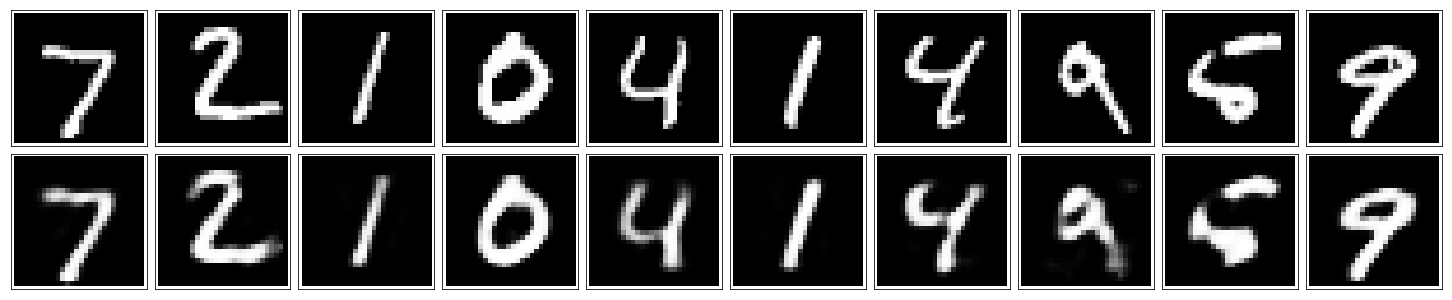

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.